## Import and Format Data

In [27]:
import os
import pandas as pd

In [46]:
data_dir = "./data"
month_dfs = {}
for month_dir in os.listdir(data_dir):
    month_dir_path = os.path.join(data_dir, month_dir)
    month_name = "".join([x for x in month_dir if not x.isdigit()])

    for i, day_file in enumerate(os.listdir(month_dir_path)):
        day_file_path = os.path.join(month_dir_path, day_file)
        day = "".join([x for x in day_file if x.isdigit()])
        df = pd.read_csv(day_file_path, sep="  ", header=None, names=['height', f'temperature_{day}'])

        if i == 0:
            month_df = df
        else:
            month_df = pd.merge(month_df, df, on='height')

    month_df_columns = month_df.columns
    temperature_columns = [x for x in month_df_columns if 'temperature' in x]
    month_df['avg_temperature'] = month_df[temperature_columns].mean(axis=1)
    
    month_dfs[month_name] = month_df
        

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [45]:
month_dfs[0]

,height,temperature_26,temperature_5,temperature_31,temperature_8,temperature_24,temperature_3,temperature_30,temperature_2,temperature_7,...,temperature_15,temperature_6,temperature_4,temperature_11,temperature_29,temperature_20,temperature_16,temperature_1,temperature_22,avg_temperature
0,0.0,298.3,297.9,298.3,298.0,298.3,297.9,298.3,297.9,298.0,...,298.1,298.0,297.9,298.1,298.3,298.2,298.2,297.8,298.2,298.129032
1,0.5,296.0,295.6,296.0,295.6,296.0,295.5,296.0,295.5,295.6,...,295.8,295.6,295.5,295.7,296.0,295.9,295.8,295.5,295.9,295.793548
2,1.0,293.6,293.1,293.7,293.2,293.6,293.1,293.7,293.0,293.2,...,293.4,293.2,293.1,293.3,293.7,293.5,293.4,293.0,293.6,293.403226
3,1.5,291.2,290.7,291.3,290.8,291.2,290.6,291.2,290.6,290.7,...,291.0,290.7,290.6,290.8,291.2,291.1,291.0,290.5,291.1,290.951613
4,2.0,288.7,288.1,288.8,288.2,288.6,288.0,288.7,288.0,288.2,...,288.4,288.1,288.1,288.3,288.7,288.6,288.5,288.0,288.6,288.419355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,118.0,353.1,354.3,355.0,352.5,352.8,352.2,355.1,352.9,353.2,...,355.3,354.1,351.7,352.0,356.0,356.2,352.6,353.5,355.8,353.867742
237,118.5,357.0,358.4,359.2,356.3,356.6,356.0,359.3,356.8,357.1,...,359.5,358.1,355.3,355.8,360.3,360.6,356.5,357.4,360.0,357.877419
238,119.0,360.9,362.4,363.4,360.1,360.5,359.8,363.5,360.6,361.0,...,363.8,362.2,359.1,359.6,364.7,365.0,360.3,361.3,364.4,361.912903
239,119.5,364.9,366.6,367.7,364.0,364.5,363.6,367.8,364.6,365.0,...,368.1,366.3,362.9,363.4,369.1,369.4,364.3,365.4,368.7,366.016129


## Visualize Data

In [60]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

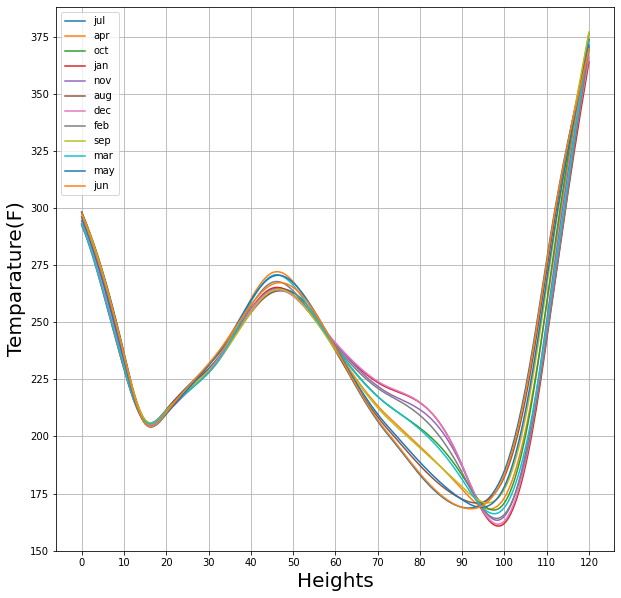

In [68]:
fig,ax = plt.subplots(1, figsize=(10,10))

for month, df in month_dfs.items():
    heights = df["height"].values
    avg_temp = df["avg_temperature"].values
    ax.plot(heights, avg_temp, label=month)
    
ax.set_xlabel("Heights", fontsize=20)
ax.set_ylabel("Temparature(F)", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.grid()
plt.legend()
plt.show()